                                                      HEART ATTACK

**HEART ATTCK PREDICTION**

Heart Attack Prediction using machine learning involves using various factors (features) related to a person's health and medical history to predict whether they are at risk of a heart attack. The key goal is to create a model that can make predictions based on available data, which can help in preventive care and early diagnosis.

In [ ]:
!unzip /content/archive (88).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip /content/archive (88).zip'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/archive (88).zip')

**UNDERSTANDING THE DATA**

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.shape

(918, 12)

In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


**DATA CLEANING**

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [ ]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


**OUTLIER DETECTION**

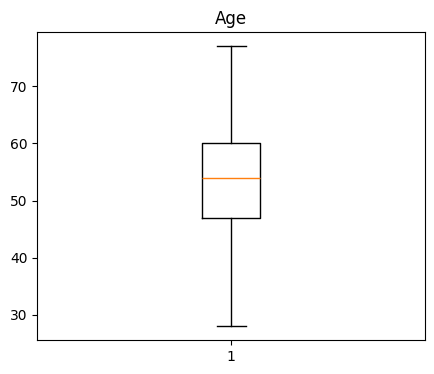

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.boxplot(df['Age'])
plt.title('Age')
plt.show()

In [ ]:
q1=df['RestingBP'].quantile(0.25)
q1

120.0

In [ ]:
q3=df['RestingBP'].quantile(0.75)
q3

140.0

In [ ]:
iqr=q3-q1
min_range=q1-1.5*iqr
print(min_range)
max_range=q3+1.5*iqr
print(max_range)

90.0
170.0


In [ ]:
df=df[(df['RestingBP'] <= max_range) & (df['RestingBP'] >= min_range)]

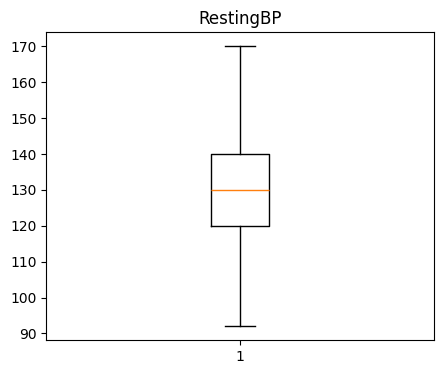

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.boxplot(df['RestingBP'])
plt.title('RestingBP')
plt.show()

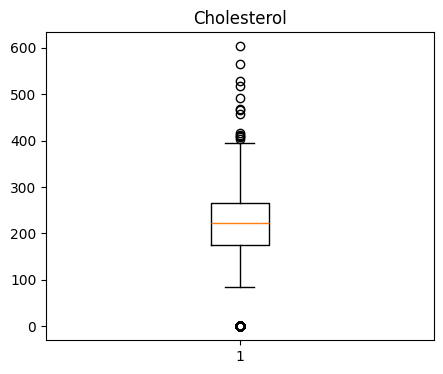

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.boxplot(df['Cholesterol'])
plt.title('Cholesterol')
plt.show()

**HEAT MAP**

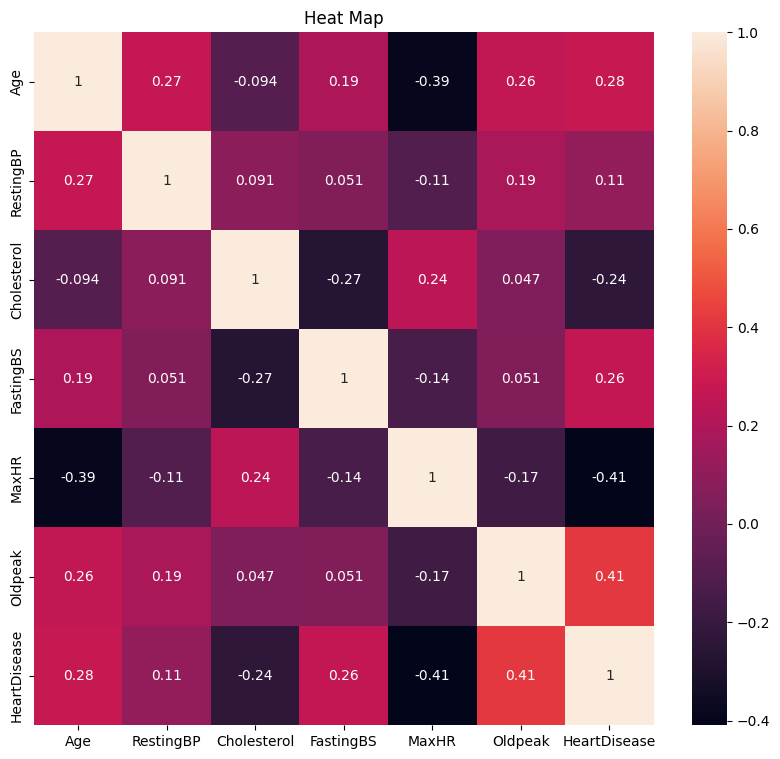

In [ ]:
plt.figure(figsize=(10,9))
var1=df.corr(numeric_only=True)
sns.heatmap(var1,annot=True)
plt.title('Heat Map')
plt.show()

**CATEGORICAL VALUE ENCODING**

In [ ]:
obj1=[]
for i in df:
  if df[i].dtype=='object':
    obj1.append(i)

In [ ]:
obj1

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

**ORDINAL ENCODING**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
obj=OrdinalEncoder(categories=[['Normal','ST','LVH']])
df['RestingECG']=obj.fit_transform(df[['RestingECG']])

<ipython-input-585-e43b1fad3ba5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RestingECG']=obj.fit_transform(df[['RestingECG']])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
obj=OrdinalEncoder(categories=[['Up','Flat','Down']])
df['ST_Slope']=obj.fit_transform(df[['ST_Slope']])

<ipython-input-586-7b6285265aa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ST_Slope']=obj.fit_transform(df[['ST_Slope']])


**LABEL ENCODING**

In [ ]:
label_Enc=[]
Onehot_Enc=[]
for i in df:
  if df[i].dtype=='object' and df[i].nunique()>2:
    Onehot_Enc.append(i)
  elif df[i].dtype=='object' and df[i].nunique()<=2:
    label_Enc.append(i)

In [ ]:
label_Enc

['Sex', 'ExerciseAngina']

In [ ]:
df['Sex']

,Sex
0,M
1,F
2,M
3,F
4,M
...,...
913,M
914,M
915,M
916,F


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

<ipython-input-590-5473b90f9496>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=le.fit_transform(df['Sex'])


In [ ]:
le.inverse_transform(df['Sex'])

array(['M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M',
       'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M',
       'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F',
       'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F',
       'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F',
       'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F',
       'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M',
       'M', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'F',
       'F', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M',
       'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_ex=LabelEncoder()
df['ExerciseAngina']=le_ex.fit_transform(df['ExerciseAngina'])

<ipython-input-592-d4e7f18dc591>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExerciseAngina']=le_ex.fit_transform(df['ExerciseAngina'])


In [ ]:
le_ex.inverse_transform(df['Sex'])

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

**ONE HOT ENCODING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False,drop='first')
result=onehot.fit_transform(df[Onehot_Enc])

In [ ]:
onehot.get_feature_names_out()

array(['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'],
      dtype=object)

In [ ]:
result=pd.DataFrame(result,columns=onehot.get_feature_names_out())

In [ ]:
result

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
885,0.0,0.0,1.0
886,0.0,0.0,0.0
887,0.0,0.0,0.0
888,1.0,0.0,0.0


In [ ]:
df=df.drop(columns=Onehot_Enc)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df=df.join(result)

In [ ]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

**SAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_resample,y_resample=sampler.fit_resample(x,y)
y_resample.value_counts()

,count
HeartDisease,
0,490
1,490


**SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x_resample)

**DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_resample,test_size=0.2,random_state=50)

In [ ]:
x_train.shape

(784, 13)

In [ ]:
x_test.shape

(196, 13)

In [ ]:
y_train.shape

(784,)

In [ ]:
y_test.shape

(196,)

**MODEL TRAINING**

**K NEAREST NEIGHBOR**

K-Nearest Neighbors (KNN) is a simple, intuitive, and versatile machine learning algorithm used for both classification and regression tasks. It is based on the idea that similar data points tend to exist near each other in the feature space.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_test,y_test)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(x_test)

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8928571428571429


In [ ]:
models=[KNeighborsClassifier()]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
  print("-----------------------------")
  print(f"Confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")
  print()
  print(f"classification_report:\n{classification_report(y_test,y_pred)}")
  print("\n\n\n")

Accuracy :0.8520408163265306
-----------------------------
Confusion_matrix:
 [[83 16]
 [13 84]]

classification_report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        99
           1       0.84      0.87      0.85        97

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196







The heart attack prediction model, implemented using the K-Nearest Neighbors (KNN) algorithm, has achieved an 86% accuracy in predicting the likelihood of heart attacks. This is a promising result, especially considering the model's ability to effectively distinguish between the two classes (heart attack or no heart attack). The high accuracy can be attributed to the balanced nature of the dataset, which was achieved through the use of the SMOTE (Synthetic Minority Over-sampling Technique) technique. By applying SMOTE, the dataset was resampled to ensure that both classes (positive and negative heart attack cases) were equally represented, thereby preventing the model from being biased towards predicting the majority class.

KNN, being a distance-based algorithm, calculates the proximity of new data points to the training examples. It works well for this problem due to its simplicity and the fact that heart attack predictions are often influenced by a combination of numerical and categorical features, such as age, cholesterol levels, blood pressure, and chest pain type. These features, when properly preprocessed, allow the KNN model to classify a new patient's data based on similarities to known examples.

The performance of the model can be further evaluated using a classification report, which provides important metrics such as precision, recall, and F1-score. These metrics give a more detailed insight into how well the model performs in detecting both heart attack and non-heart attack cases. A high precision indicates that when the model predicts a heart attack, it is correct most of the time.
Overall, this model provides a reliable approach for heart attack prediction, which can be useful in clinical decision-making, potentially aiding healthcare professionals in making faster, data-driven decisions. While 86% accuracy is impressive, future improvements could involve fine-tuning the model's hyperparameters, exploring other algorithms, or incorporating additional features such as family history or lifestyle factors to further enhance prediction accuracy.